In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

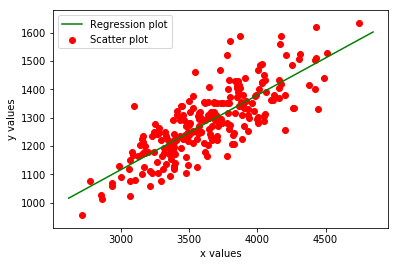

In [14]:
data=pd.read_csv("headbrain.csv")
x=data['Head Size(cm^3)'].values
y=data['Brain Weight(grams)'].values
mean_x=x.mean()
mean_y=y.mean()
#For finding m and c value in y=mx+c
length=len(x)
num=0
dem=0
for i in range(length):
    num+=(x[i]-mean_x)*(y[i]-mean_y)
    dem+=(x[i]-mean_x)**2
val_m=num/dem
val_c=mean_y-(val_m*mean_x)

#For drawing Regression plot and scatter plt

max_x=max(x)+100
min_x=min(x)-100
x1=np.linspace(min_x,max_x,1000)
y1=val_m*x1+val_c
plt.plot(x1,y1,color="green",label="Regression plot")
plt.scatter(x,y,c="red",label="Scatter plot")
plt.xlabel("x values")
plt.ylabel("y values")
plt.legend()
plt.show()

### LinearRegression Model Example

In [29]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data=pd.read_csv("headbrain.csv")
x=data['Head Size(cm^3)'].values
y=data['Brain Weight(grams)'].values

lin_reg=LinearRegression()

x=x.reshape((len(x),1))
lin_reg.fit(x,y)
yp=lin_reg.predict(x)

lin_reg.predict([[2500]])

lin_reg.score(x,y) # Finding the score of the given values

0.639311719957

### LinearRegression Example 2

In [47]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data2=pd.read_table("http://bit.ly/movieusers",sep="|",header=None)

x=data2[1][1:70].values
y=data2[4][1:70].values

logs_reg=LinearRegression()
x=x.reshape((len(x),1))
logs_reg.fit(x,y)
logs_reg.predict(x)

#logs_reg.predict([[2500]])
logs_reg.score(x,y)

C:\Users\RANGA\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: read_table is deprecated, use read_csv instead.
  """


0.0026824179461950592

### LinearRegression Example 3

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

x=np.random.randint(10,100,150)
y=5*x+2.3+np.random.rand(150)
x=x.reshape((len(x),1))
k=LinearRegression()
k.fit(x,y)
k.predict(x)

k.predict([[25]])
k.score(x,y)

0.9999950076113481

## Polynomial Regression

In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
m=100
x=6*np.random.rand(m,1)-3
y=0.5*x**2+x+2+np.random.randn(m,1)
poly_reg=PolynomialFeatures(degree=2,include_bias=False)
lin_reg=LinearRegression()

tran=poly_reg.fit_transform(x)
lin_reg.fit(tran,y)
lin_reg.intercept_,lin_reg.coef_

(array([2.00609754]), array([[0.97207278, 0.46034523]]))

### Polynomial Example

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

data=pd.read_csv("data.csv")
x=data.iloc[:,1:2].values
y=data.iloc[:,2].values

poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x)
poly.fit(x_poly,y)
lin2=LinearRegression()
lin2.fit(x_poly,y)
#lin2.predict()
#lin2.predict(x)
lin2.intercept_,lin2.coef_

plt.scatter(x,y,color="blue")
plt.plot(x,lin2.predict(poly.fit_transform(x)),color="red")
plt.show()

<Figure size 640x480 with 1 Axes>

### Polynomial Example-2

In [53]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import load_boston

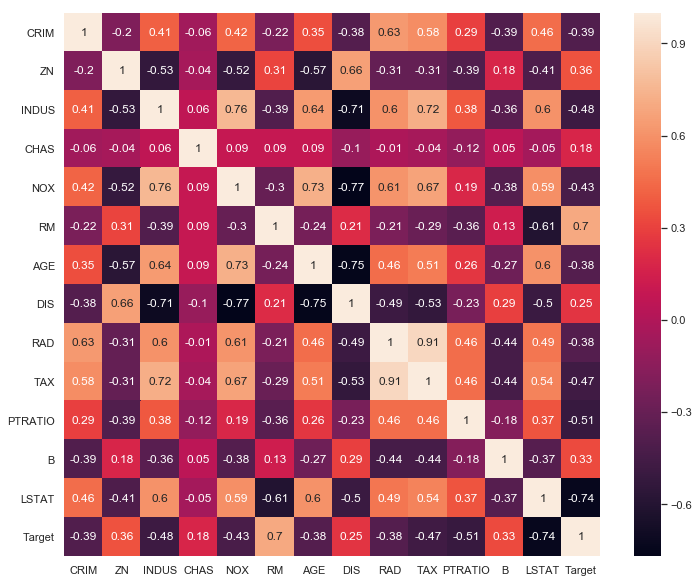

In [54]:
load_bos=load_boston()
load_bos.data
#load_bos.target
data=pd.DataFrame(load_bos.data,columns=load_bos.feature_names)
#boston_dataset.DESCR,boston_dataset.filename,boston_dataset.target,
#print(data.head())
#print(load_bos.keys())
data['Target']=load_bos.target
cor=data.corr().round(2)
sn.set(rc={'figure.figsize':(12,10)})
sn.heatmap(data=cor,annot=True)

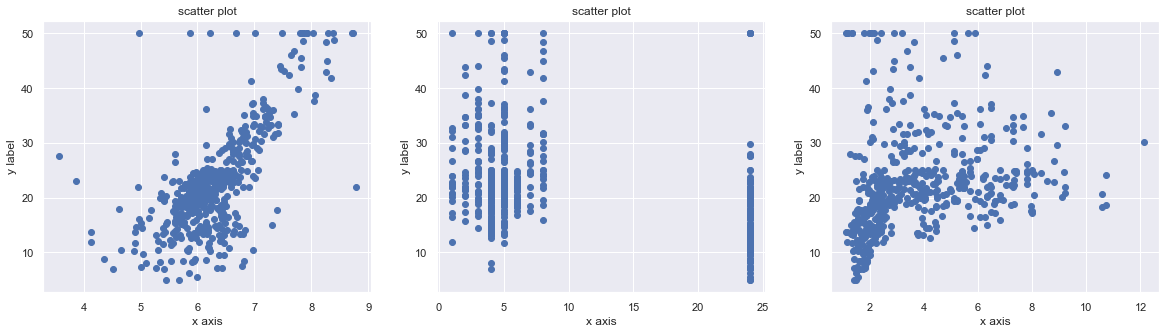

In [55]:
plt.figure(figsize=(20,5))

features=['RM','RAD','DIS']

target=data['Target']

for i,col in enumerate(features):
    plt.subplot(1,len(features),i+1)
    x=data[col]
    y=target
    plt.scatter(x,y,marker='o')
    plt.title("scatter plot")
    plt.xlabel("x axis")
    plt.ylabel("y label")

In [62]:
x=pd.DataFrame(np.c_[data['RM'],data['RAD'],data['DIS']],columns=['RM','RAD','DIS'])

y=data['Target']

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)

y_train_predict=lin_reg.predict(x_train)
rmre=(np.sqrt(mean_squared_error(y_train,y_train_predict)))
r2 = r2_score(y_train, y_train_predict)
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmre))
print('R2 score is {}'.format(r2))
print("\n")
      
y_test_predict=lin_reg.predict(x_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))

# r-squared score of the model
r2 = r2_score(y_test, y_test_predict)
print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 6.242618990688783
R2 score is 0.5175832661848905


The model performance for testing set
--------------------------------------
RMSE is 6.169834302904161
R2 score is 0.6148147236192347


In [63]:
poly_features=PolynomialFeatures(degree=3)
x_train_poly=poly_features.fit_transform(x_train)
poly_model=LinearRegression()
poly_model.fit(x_train_poly,y_train)

y_train_predicted=poly_model.predict(x_train_poly)
y_test_predict=poly_model.predict(poly_features.fit_transform(x_test))

rmse_train=np.sqrt(mean_squared_error(y_train,y_train_predicted))
r2_train=r2_score(y_train,y_train_predicted)

rmse_test=np.sqrt(mean_squared_error(y_test,y_test_predict))
r2_test=r2_score(y_test,y_test_predict)

print("RMSE {}".format(rmse_train))
print("R2 Value train",r2_train)

print("RMSE {}".format(rmse_test))
print("R2 Value test",r2_test)

RMSE 5.056608268630495
R2 Value train 0.68347550354772
RMSE 5.162757187991549
R2 Value test 0.730296814210206


### Ridge 

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge
import numpy as np
m=5
x=6*np.random.rand(m,1)-3
y=0.5*x**2+x+2+np.random.rand(m,1)

ridge_reg.fit(x,y)
print(ridge_reg.coef_,ridge_reg.intercept_)
print(ridge_reg.predict([[1.2]]))
ridge_reg=Ridge(alpha=10,solver = 'cholesky')

boston=load_boston()
b_df=pd.DataFrame(boston.data,columns=boston.feature_names)

b_df['Price']=boston.target
new_x=b_df.drop('Price',axis=1)
new_y=b_df['Price']

NameError: name 'ridge_reg' is not defined

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(new_x,new_y,test_size=0.3,random_state=1)
lin=LinearRegression()
lin.fit(x_train,y_train)
rr=Ridge(alpha=1)

lin.fit(x_train,y_train)
train_score=lin.score(x_train,y_train)
train_score